In [20]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
model = pickle.load(open('decision_tree_completion.p', 'rb')) # load the model

In [3]:
# model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
#             max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=10, min_samples_split=5,
#             min_weight_fraction_leaf=0.0001, presort=False,
#             random_state=None, splitter='best')

In [22]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)


In [23]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')
y_test = y_test['module_not_completed']
numeric_cols = ['num_of_prev_attempts', 'studied_credits',
'clicks_per_day', 'pct_days_vle_accessed','max_clicks_one_day',
'first_date_vle_accessed', 'avg_score', 'avg_days_sub_early', 'days_early_first_assessment',
'score_first_assessment']
# fill and scale
X_train.fillna(value = 0, inplace = True)
X_train = scale_subset(X_train, numeric_cols)
X_test.fillna(value = 0, inplace = True)
X_test = scale_subset(X_test, numeric_cols)


/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [24]:
# model.fit(X_train, y_train)

In [25]:
predictions = model.predict(X_test)

In [26]:
recall = recall_score(y_test, predictions)
recall

0.8018900945047253

In [27]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.8348587789500279

In [28]:
probas = model.predict_proba(X_test)[:, :1]
tprs, fprs, thresh = roc_curve(y_test, probas)

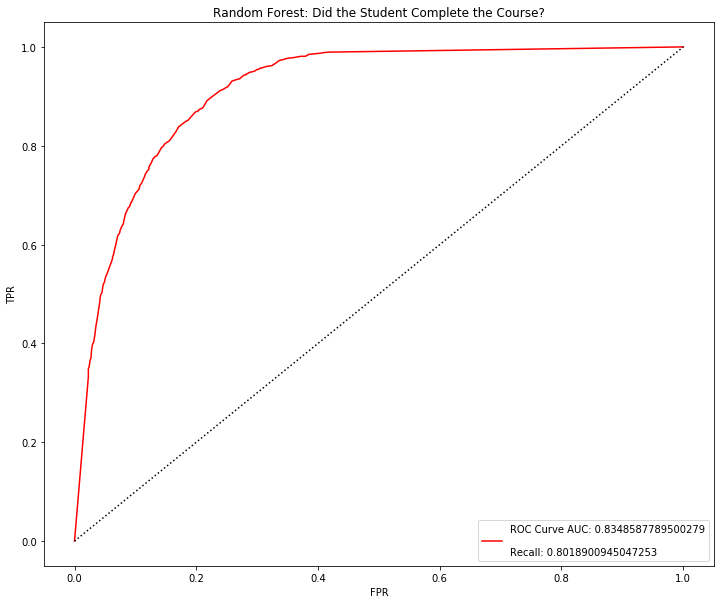

In [29]:
plt.figure(figsize=(12,10))
plt.plot(fprs, tprs, 
    label='ROC Curve AUC: {}\n\nRecall: {}'.format(roc_auc, recall),
    color='red')
plt.plot([0,1],[0,1], 'k:')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Random Forest: Did the Student Complete the Course?")
plt.show()

In [30]:
# print(confusion_matrix(y_test, predictions))
print('Decision Tree With Feature Engineering')
print(classification_report(y_test, predictions))

Decision Tree With Feature Engineering
              precision    recall  f1-score   support

       False       0.79      0.87      0.83      5054
        True       0.87      0.80      0.84      5714

   micro avg       0.83      0.83      0.83     10768
   macro avg       0.83      0.83      0.83     10768
weighted avg       0.84      0.83      0.83     10768



In [31]:
# pd.DataFrame(data={'frps': fprs, 'tprs': tprs, 'Thresholds': thresh})

# Which features are most important?

In [32]:
model.feature_importances_

array([1.93180050e-03, 1.57151058e-02, 4.06023606e-02, 1.87517870e-01,
       1.87748840e-02, 1.62534991e-02, 1.99485252e-01, 4.32222218e-02,
       2.08126818e-02, 3.86512255e-01, 1.17379884e-02, 7.66136241e-04,
       1.29666957e-03, 2.08588806e-03, 1.43027637e-02, 2.96457112e-03,
       0.00000000e+00, 1.73110372e-03, 2.02639195e-03, 8.03921568e-03,
       0.00000000e+00, 4.23390203e-03, 0.00000000e+00, 2.89752938e-04,
       1.26840611e-04, 2.39545070e-04, 4.16946569e-05, 5.58790535e-04,
       1.15262730e-03, 0.00000000e+00, 2.58671057e-04, 6.69458131e-04,
       3.80282152e-04, 7.94937412e-04, 8.01933657e-06, 0.00000000e+00,
       3.48393901e-04, 4.18351072e-03, 0.00000000e+00, 1.59720721e-04,
       0.00000000e+00, 1.16199522e-03, 8.56241032e-04, 1.14070584e-03,
       3.80446061e-04, 2.92970884e-04, 6.56627244e-05, 1.43574275e-04,
       5.38040163e-04, 2.80741491e-03, 5.59693869e-04, 2.50204448e-03,
       0.00000000e+00, 0.00000000e+00, 3.26404852e-04, 0.00000000e+00])

In [33]:
feat_imp = list(list(model.feature_importances_))
features = list(X_test.columns)

In [34]:
coef_dict = c.OrderedDict((zip(feat_imp, features)))

In [35]:
sorted(coef_dict.items(), reverse=True)

[(0.3865122550254279, 'score_first_assessment'),
 (0.19948525249597046, 'avg_score'),
 (0.1875178696351488, 'pct_days_vle_accessed'),
 (0.043222221756727186, 'avg_days_sub_early'),
 (0.04060236057705685, 'clicks_per_day'),
 (0.02081268176869952, 'days_early_first_assessment'),
 (0.01877488396263515, 'max_clicks_one_day'),
 (0.01625349910156696, 'first_date_vle_accessed'),
 (0.015715105794293725, 'studied_credits'),
 (0.014302763746446153, 'code_module_FFF'),
 (0.011737988413348211, 'code_module_BBB'),
 (0.008039215677770902, 'code_presentation_2014J'),
 (0.004233902025212248, 'gender_M'),
 (0.004183510722696054, 'highest_education_Lower Than A Level'),
 (0.00296457111840564, 'code_module_GGG'),
 (0.0028074149109557165, 'imd_band_90-100%'),
 (0.0025020444827086328, 'age_band_35-55'),
 (0.0020858880573486342, 'code_module_EEE'),
 (0.002026391953313974, 'code_presentation_2014B'),
 (0.0019318004953303054, 'num_of_prev_attempts'),
 (0.001731103721242709, 'code_presentation_2013J'),
 (0.001

In [19]:
pickle.dump(model, open('decision_tree_completion.p', 'wb')) # save the model